O conjunto de dados, é sobre de uma variedade de sensores IoT, para manutenção preditiva na indústria de elevadores. Os dados são úteis para manutenção preditiva de portas de elevadores, a fim de reduzir paradas não planejadas e maximizar o ciclo de vida do equipamento. Neste projeto será feito, uma análise exploratória, e modelo preditivo LSTM na forma de série temporais.

Link dataset: https://www.kaggle.com/datasets/shivamb/elevator-predictive-maintenance-dataset

In [8]:
import pandas as pd

# Carregar os dados
df = pd.read_csv("/content/drive/MyDrive/Dataset Manutenção Elevador/predictive-maintenance-dataset.csv")

# Visualizar as primeiras linhas da tabela
df.head()

,ID,revolutions,humidity,vibration,x1,x2,x3,x4,x5
0,1,93.744,73.999,18.0,167.743,19.745,1.266828,8787.937536,5475.852001
1,2,93.740,73.999,18.0,167.739,19.741,1.266774,8787.187600,5475.852001
2,3,93.736,73.998,18.0,167.734,19.738,1.266737,8786.437696,5475.704004
3,4,93.732,73.998,18.0,167.730,19.734,1.266683,8785.687824,5475.704004
4,5,93.729,73.998,18.0,167.727,19.731,1.266642,8785.125441,5475.704004


O conjunto de dados possui as seguintes colunas:

ID: Parece ser um identificador único para cada registro.

revolutions: Refere-se à quantidade de revoluções.

humidity: Refere-se à umidade.

vibration: Refere-se à vibração.

x1, x2, x3, x4, x5: Parecem ser variáveis de características adicionais.

In [9]:
# Verificando valores ausentes
df.isnull().sum()

ID                0
revolutions       0
humidity          0
vibration      2438
x1                0
x2                0
x3                0
x4                0
x5                0
dtype: int64

O conjunto de dados contém um total de 112.001 entradas e 9 colunas.

A coluna "vibration" tem 2.438 valores faltantes.

Preenchendo os valores ausentes na coluna 'vibration' com a média.

In [10]:
# Preenchendo os valores ausentes na coluna 'vibration' com a média
df['vibration'].fillna(df['vibration'].mean(), inplace=True)

# Verificando novamente os valores faltantes para confirmar
df.isnull().sum()

ID             0
revolutions    0
humidity       0
vibration      0
x1             0
x2             0
x3             0
x4             0
x5             0
dtype: int64

In [ ]:
# Obtendo estatísticas descritivas
df.describe()

,ID,revolutions,humidity,vibration,x1,x2,x3,x4,x5
count,112001.000000,112001.000000,112001.000000,112001.000000,112001.000000,112001.000000,112001.000000,112001.000000,112001.000000
mean,56001.000000,46.275195,74.224140,28.340276,120.499335,-27.948945,0.623759,2503.994994,5509.691804
std,32332.048087,19.042179,0.684711,24.026647,18.984921,19.123796,0.258677,1874.972912,101.395621
min,1.000000,16.933000,72.399000,2.000000,90.132000,-56.353000,0.231328,286.726489,5241.615201
25%,28001.000000,29.651000,73.914000,8.000000,103.850000,-44.548000,0.399615,879.181801,5463.279396
50%,56001.000000,43.348000,74.212000,21.460000,117.640000,-31.443000,0.580561,1879.049104,5507.420944
75%,84001.000000,63.997000,74.731000,38.820000,138.119000,-10.012000,0.865330,4095.616009,5584.722361
max,112001.000000,93.744000,75.400000,100.000000,167.743000,19.745000,1.266828,8787.937536,5685.160000


Aqui estão algumas estatísticas descritivas para o conjunto de dados:

revolutions:

Média: 46.275.
Desvio Padrão: 19.042.
Valor Mínimo: 16.933.
Valor Máximo: 93.744.

humidity:

Média: 74.224.
Desvio Padrão: 0.685.
Valor Mínimo: 72.399.
Valor Máximo: 75.400.

vibration:

Média: 28.340.
Desvio Padrão: 24.293.
Valor Mínimo: 2.000.
Valor Máximo: 100.000.
As colunas x1, x2, x3, x4 e x5 também possuem suas respectivas médias, desvios padrão, mínimos e máximos.

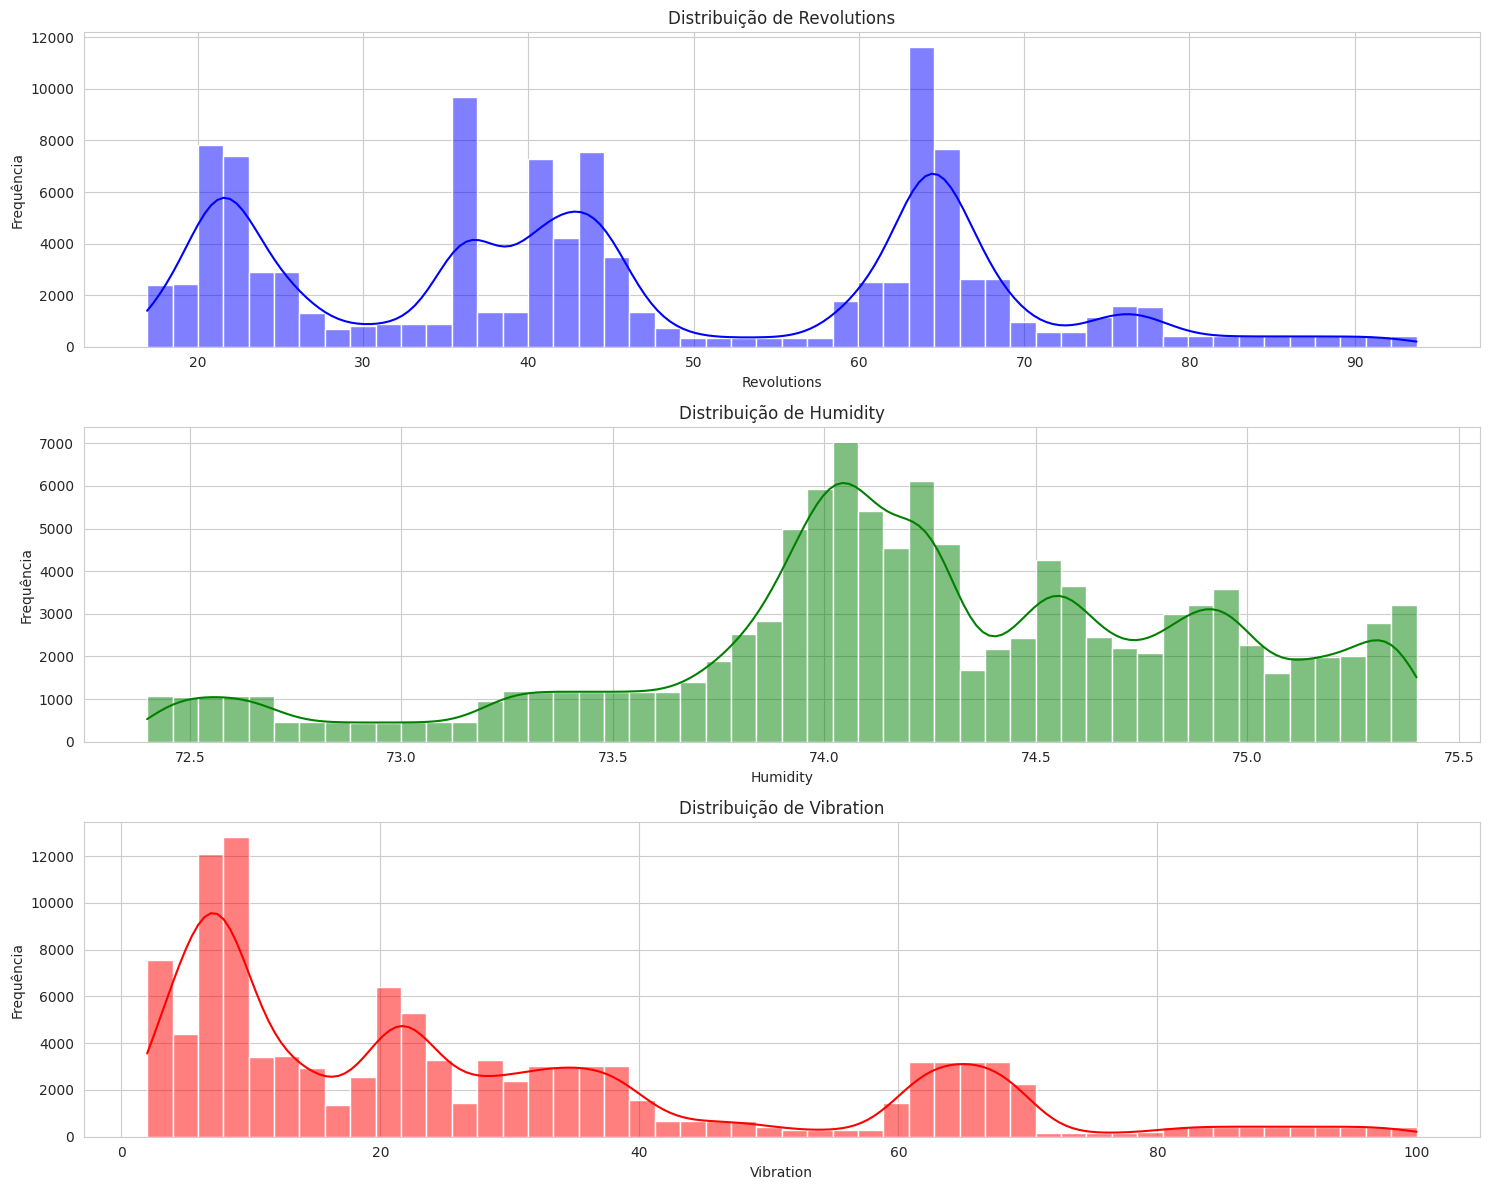

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo
sns.set_style("whitegrid")

# Criando uma figura e eixos
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

# Plotando a distribuição para 'revolutions', 'humidity' e 'vibration'
sns.histplot(df['revolutions'], ax=ax[0], color='blue', bins=50, kde=True)
ax[0].set_title('Distribuição de Revolutions')
ax[0].set_xlabel('Revolutions')
ax[0].set_ylabel('Frequência')

sns.histplot(df['humidity'], ax=ax[1], color='green', bins=50, kde=True)
ax[1].set_title('Distribuição de Humidity')
ax[1].set_xlabel('Humidity')
ax[1].set_ylabel('Frequência')

sns.histplot(df['vibration'].dropna(), ax=ax[2], color='red', bins=50, kde=True) # removendo NaN
ax[2].set_title('Distribuição de Vibration')
ax[2].set_xlabel('Vibration')
ax[2].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

Aqui estão as distribuições para as colunas "revolutions", "humidity" e "vibration":

Revolutions: A distribuição parece ser bimodal, com dois picos principais. Isto sugere que há dois estados ou modos predominantes de revoluções no conjunto de dados.

Humidity: A umidade tem uma distribuição ligeiramente inclinada para a esquerda, indicando que a maioria dos valores estão concentrados em torno de uma faixa específica.

Vibration: A distribuição da vibração é inclinada para a direita, com um grande número de valores baixos e uma cauda que se estende para valores mais altos.

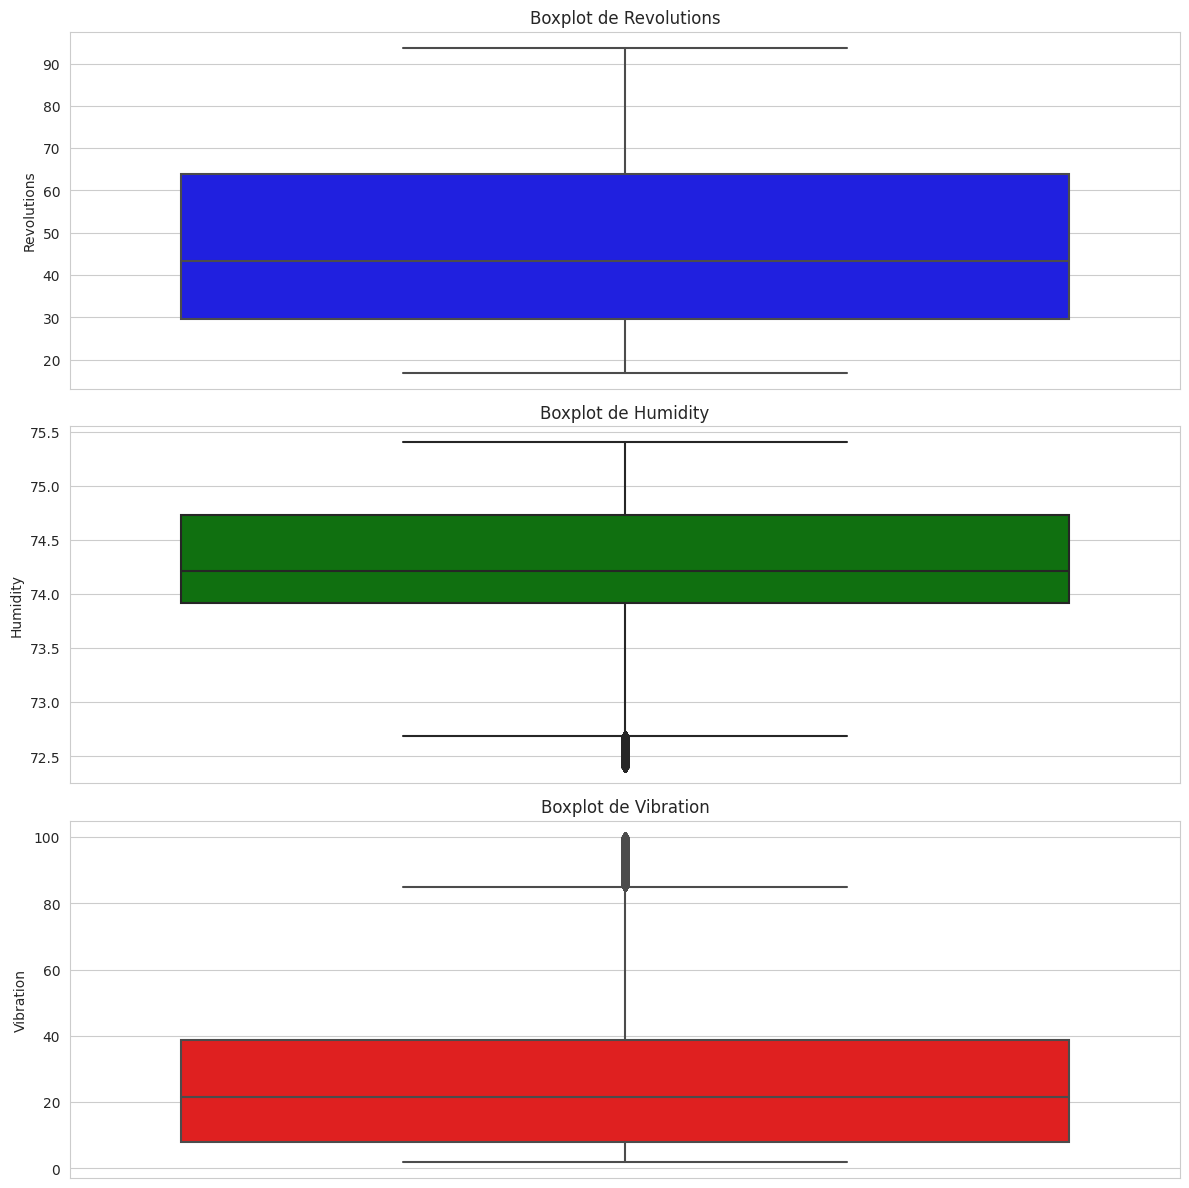

In [ ]:
# Criando boxplots para 'revolutions', 'humidity', e 'vibration'
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

sns.boxplot(y=df['revolutions'], ax=ax[0], color='blue')
ax[0].set_title('Boxplot de Revolutions')
ax[0].set_ylabel('Revolutions')

sns.boxplot(y=df['humidity'], ax=ax[1], color='green')
ax[1].set_title('Boxplot de Humidity')
ax[1].set_ylabel('Humidity')

sns.boxplot(y=df['vibration'].dropna(), ax=ax[2], color='red') # removendo NaN
ax[2].set_title('Boxplot de Vibration')
ax[2].set_ylabel('Vibration')

plt.tight_layout()
plt.show()

Os boxplots oferecem uma visualização da distribuição de dados e possíveis outliers:

Boxplot de Revolutions: A mediana está próxima de 45. A maioria dos dados está concentrada entre 30 e 65. Não parece haver outliers.

Boxplot de Humidity: A mediana está próxima de 74.2. A maioria dos dados está concentrada entre 73.9 e 74.7. Existem alguns outliers no extremo inferior.

Boxplot de Vibration: A mediana está próxima de 21. A maioria dos dados está concentrada entre 8 e 39. Não parece haver outliers.

Vamos criar um pairplot para algumas das colunas para visualizar as relações bivariadas entre elas.

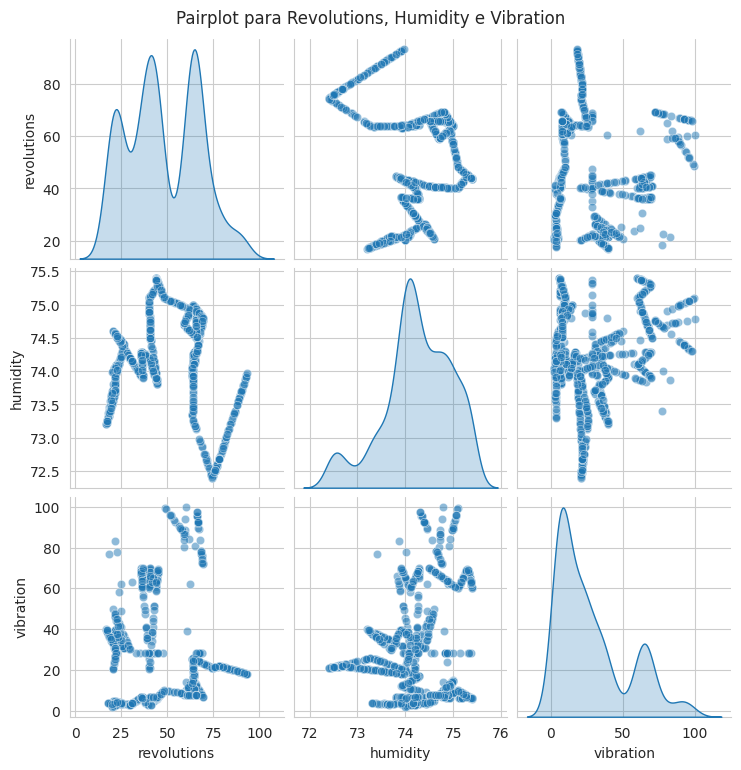

In [ ]:
# Selecionando uma amostra do conjunto de dados para o pairplot
sample_df = df.sample(1000, random_state=42)

# Criando o pairplot para 'revolutions', 'humidity', e 'vibration'
sns.pairplot(sample_df[['revolutions', 'humidity', 'vibration']], diag_kind="kde", plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot para Revolutions, Humidity e Vibration', y=1.02)
plt.show()

O pairplot oferece uma visão bivariada das relações entre as variáveis:

Na diagonal, temos a distribuição (estimativa de densidade do kernel) de cada variável.

Fora da diagonal, temos os gráficos de dispersão entre pares de variáveis.

O pairplot oferece uma visão bivariada das relações entre as variáveis:

Na diagonal, temos a distribuição (estimativa de densidade do kernel) de cada variável.
Fora da diagonal, temos os gráficos de dispersão entre pares de variáveis.
Observações:

Revolutions vs. Humidity:
Não há uma relação linear clara entre essas duas variáveis.
Revolutions vs. Vibration:
Não há uma relação linear clara. No entanto, parece haver uma densidade maior de pontos na parte inferior esquerda.
Humidity vs. Vibration:
Novamente, não há uma relação linear clara entre essas variáveis.

Vamoos visualizar a distribuição das colunas 'x1', 'x2', 'x3', 'x4', e 'x5'

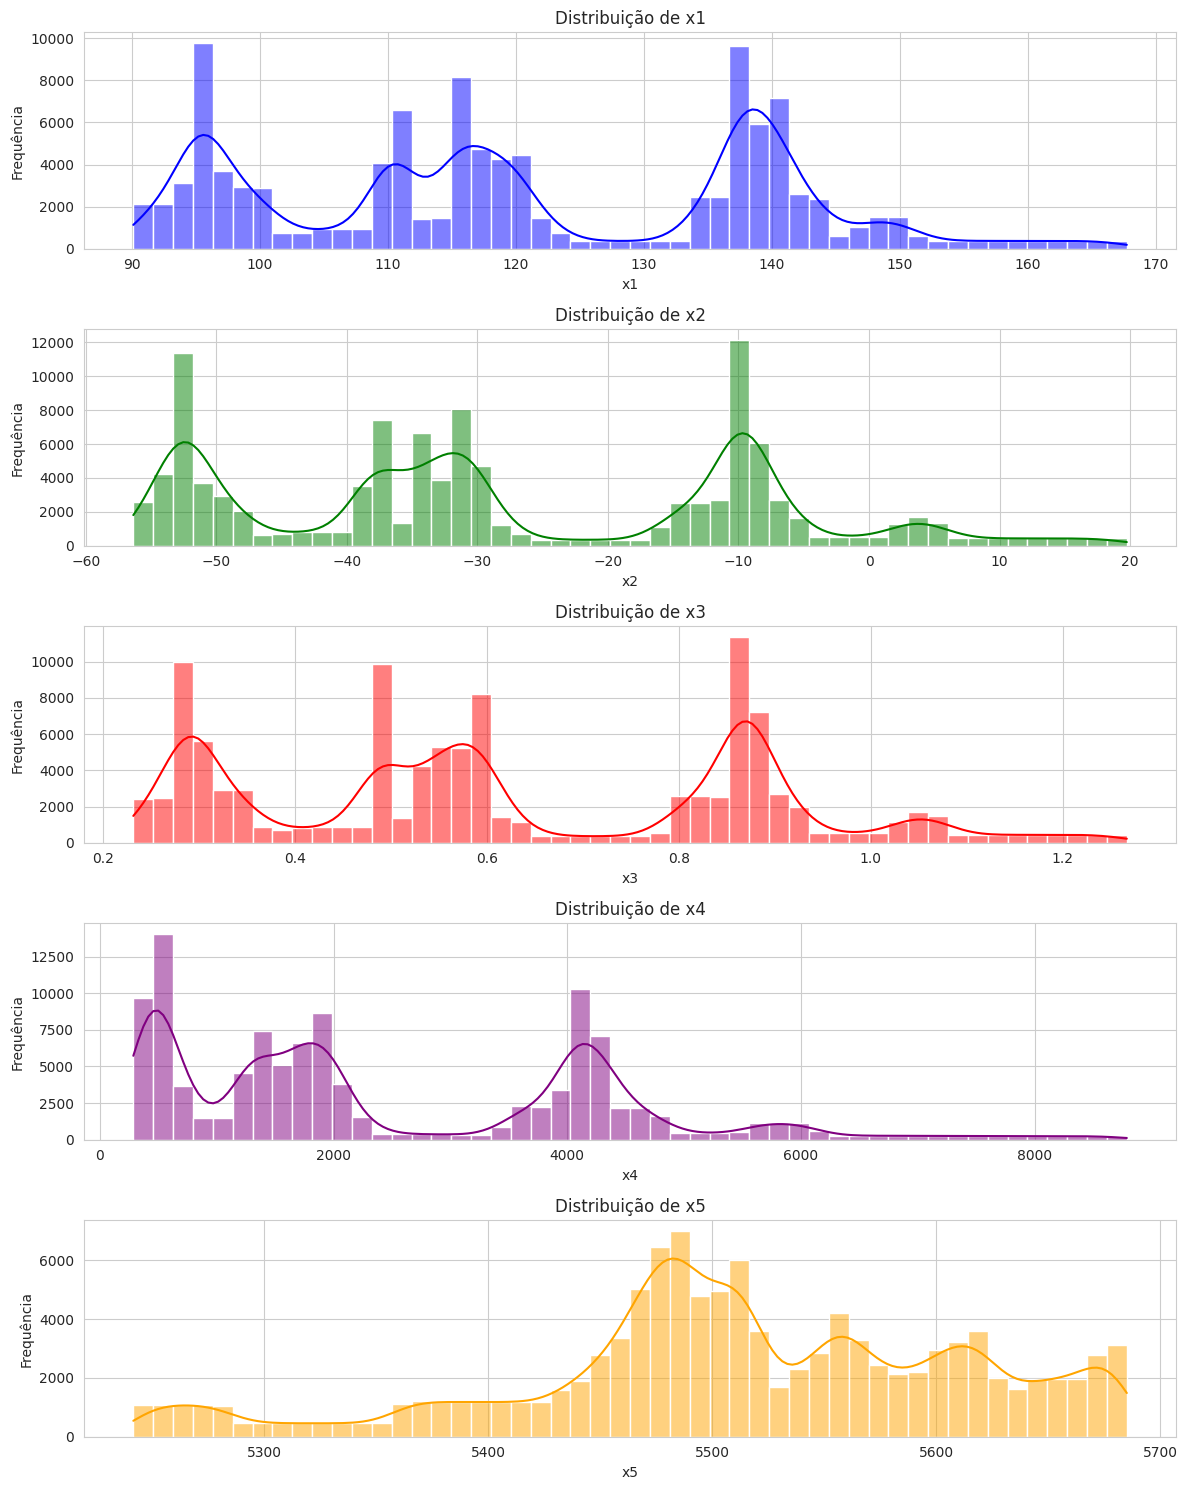

In [ ]:
# Criando uma figura e eixos
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12, 15))

# Plotando a distribuição para 'x1', 'x2', 'x3', 'x4', e 'x5'
sns.histplot(df['x1'], ax=ax[0], color='blue', bins=50, kde=True)
ax[0].set_title('Distribuição de x1')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('Frequência')

sns.histplot(df['x2'], ax=ax[1], color='green', bins=50, kde=True)
ax[1].set_title('Distribuição de x2')
ax[1].set_xlabel('x2')
ax[1].set_ylabel('Frequência')

sns.histplot(df['x3'], ax=ax[2], color='red', bins=50, kde=True)
ax[2].set_title('Distribuição de x3')
ax[2].set_xlabel('x3')
ax[2].set_ylabel('Frequência')

sns.histplot(df['x4'], ax=ax[3], color='purple', bins=50, kde=True)
ax[3].set_title('Distribuição de x4')
ax[3].set_xlabel('x4')
ax[3].set_ylabel('Frequência')

sns.histplot(df['x5'], ax=ax[4], color='orange', bins=50, kde=True)
ax[4].set_title('Distribuição de x5')
ax[4].set_xlabel('x5')
ax[4].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

Aqui estão as distribuições para as colunas 'x1', 'x2', 'x3', 'x4' e 'x5':

x1: A distribuição tem uma forma bimodal, com dois picos principais.

x2: A distribuição é inclinada para a esquerda, com um grande número de valores na extremidade direita.

x3: A distribuição é aproximadamente normal, mas com um leve viés para a esquerda.

x4: A distribuição é inclinada para a esquerda, com um grande número de valores na extremidade direita.

x5: A distribuição tem uma forma ligeiramente bimodal, com dois picos.

In [2]:
# Calculando a matriz de correlação
df.corr()

,ID,revolutions,humidity,vibration,x1,x2,x3,x4,x5
ID,1.000000,-0.973084,0.061616,0.085588,-0.973796,-0.971137,-0.972381,-0.938444,0.058631
revolutions,-0.973084,1.000000,-0.101476,-0.114768,0.999356,0.999365,0.999593,0.982563,-0.098903
humidity,0.061616,-0.101476,1.000000,0.136469,-0.065716,-0.136847,-0.128683,-0.207702,0.999980
vibration,0.085588,-0.114768,0.136469,1.000000,-0.110225,-0.119131,-0.117370,-0.142570,0.136830
x1,-0.973796,0.999356,-0.065716,-0.110225,1.000000,0.997444,0.997967,0.978035,-0.063136
x2,-0.971137,0.999365,-0.136847,-0.119131,0.997444,1.000000,0.999934,0.985806,-0.134285
x3,-0.972381,0.999593,-0.128683,-0.117370,0.997967,0.999934,1.000000,0.985077,-0.126093
x4,-0.938444,0.982563,-0.207702,-0.142570,0.978035,0.985806,0.985077,1.000000,-0.205227
x5,0.058631,-0.098903,0.999980,0.136830,-0.063136,-0.134285,-0.126093,-0.205227,1.000000


Observações da matriz de correlação:

A coluna revolutions tem uma correlação muito alta com x1, x2, x3, e x4. Isto sugere que estas variáveis podem ter informações semelhantes.

humidity e x5 também têm uma correlação extremamente alta, quase 1. Novamente, isso sugere que eles podem estar representando informações muito semelhantes.

As colunas vibration, humidity, e x5 têm correlações relativamente baixas com as outras colunas, indicando que elas podem trazer informações únicas.

Vamos visualizar estas correlações com um mapa de calor .

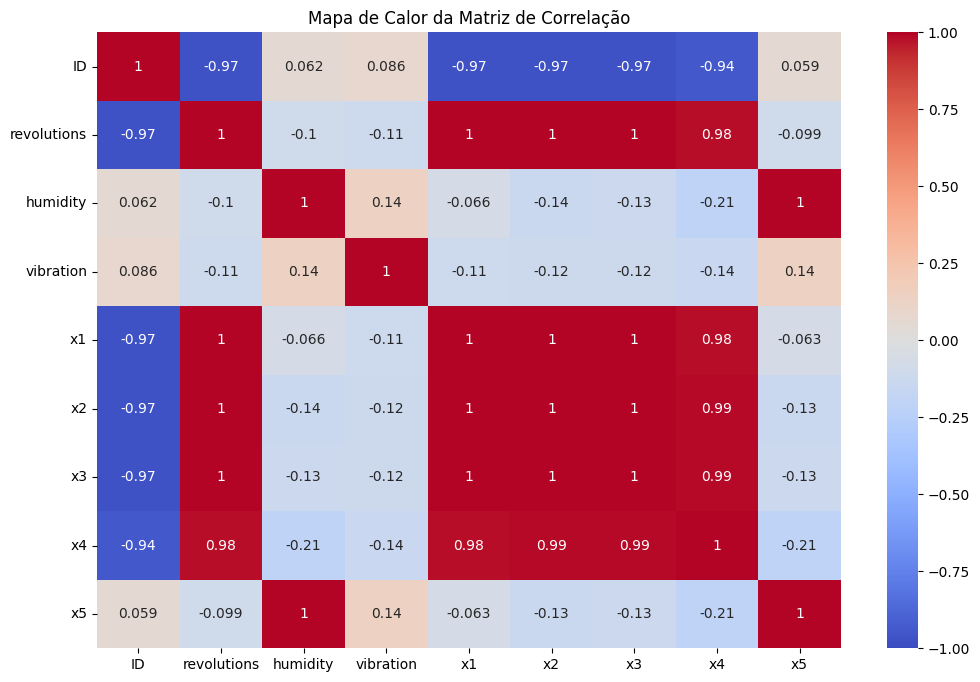

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizando a matriz de correlação com um mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

Observações a partir do mapa de calor:

revolutions, x1, x2, x3, e x4 têm áreas em tons de vermelho entre si, o que indica uma forte correlação positiva. Isso confirma nossa observação anterior de que essas variáveis estão altamente correlacionadas.

humidity e x5 têm um bloco vermelho brilhante, indicando uma correlação quase perfeita.

A maioria das outras correlações são moderadas ou fracas, como indicado por cores mais suaves no mapa de calor.

Vamos criar um modelo LSTM utilizando a biblioteca TensorFlow para prever o valor absoluto da vibração.

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Carregando os dados
data = df

# Assumindo que a coluna a ser prevista é 'vibration'
vibration = data['vibration'].values

# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
vibration_normalized = scaler.fit_transform(vibration.reshape(-1, 1))

# Dividindo os dados em sequências para treinamento do modelo LSTM
seq_length = 10
X, y = [], []
for i in range(len(vibration_normalized) - seq_length):
    X.append(vibration_normalized[i:i+seq_length])
    y.append(vibration_normalized[i+seq_length])

X = np.array(X)
y = np.array(y)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definindo o modelo LSTM
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Fazendo previsões
y_pred = model.predict(X_test)

# Desnormalizando as previsões
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Calculando métricas
mse = mean_squared_error(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

700/700 [==============================] - 4s 4ms/step
MSE: 31.671153220256016
MAE: 1.6311902100839857
R2 Score: 0.9453278103520457


Aqui estão os valores das métricas calculadas:

MSE (Erro Quadrático Médio): 31.671153220256016

MAE (Erro Absoluto Médio): 1.6311902100839857

R²(Coeficiente de Determinação): 0.9453278103520457

Vamos analisar esses valores:

MSE (Erro Quadrático Médio): O valor de MSE é relativamente baixo, o que sugere que o modelo tem um bom ajuste aos dados. No entanto, o valor absoluto do MSE pode ser mais interpretável quando comparado com outras métricas ou outros modelos.

MAE (Erro Absoluto Médio): O MAE de aproximadamente 1.63 indica que, em média, o modelo erra em cerca de 1.63 unidades ao prever a variável 'vibration'. Este valor dá uma ideia direta da magnitude do erro.

R²(Coeficiente de Determinação): Um R² de aproximadamente 0.945 é bastante alto e indica que o modelo explica cerca de 94,5% da variabilidade nos dados de 'vibration'. Isso sugere que o modelo tem um desempenho muito bom.

Conclusões

O modelo LSTM foi utilizado para prever os valores da coluna 'vibration'. A preparação dos dados envolveu a criação de sequências temporais e a divisão em conjuntos de treinamento e teste. Após o treinamento, o modelo foi avaliado usando várias métricas.

O modelo LSTM parece ter um desempenho muito bom na previsão da variável 'vibration', com base nas métricas fornecidas. O valor alto de R² sugere que o modelo é capaz de capturar a maioria da variabilidade nos dados, e os valores de MSE e MAE sugerem que os erros nas previsões são relativamente baixos.

No entanto, sempre é uma boa prática comparar o desempenho deste modelo com outros modelos ou benchmarks para ter uma ideia mais clara de seu desempenho relativo. Também pode ser útil visualizar as previsões versus os valores reais para obter uma compreensão visual do desempenho do modelo.​